### Project 2020
###### Machine Learning and Statistics
###### Submission Date: January 8th, 2021

#### Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

(0.0, 130.0)

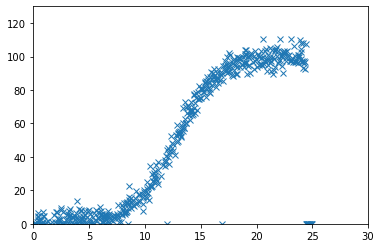

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras as kr
from tensorflow.keras import layers
input_file = "powerproduction.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0)

original_headers = list(df.columns.values)

df = df._get_numeric_data()

numeric_headers = list(df.columns.values)


numpy_array = df.to_numpy()
X = numpy_array
# Plot the data set.
plt.plot(X[:,0], X[:,1], 'x')
# Set reasonable limits.
plt.xlim([0,30])
plt.ylim([0,130])

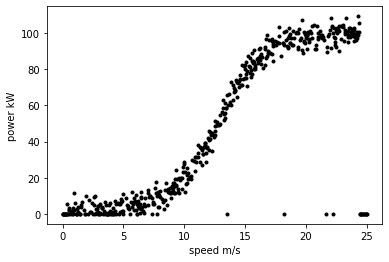

In [63]:
a, m, n, t = 100.0, 20.0, 1200.0, 1.8

x = np.linspace(0.0, 25.0, 1000)

x = x[np.sort(np.random.choice(len(x), size=len(x) // 2, replace=False))]

e = np.random.normal(0.0, 4.0, len(x))

y = a * ((1.0 + m * np.exp(-x / t)) / (1.0 + n * np.exp(-x / t)))
y = y + e

y[y < 0] = 0.0
y[x <= 0.3] = 0.0

y[x >= 24.4] = 0.0

y[np.sort(np.random.choice(len(y), size=len(y) // 100, replace=False))] = 0.0

fig = plt.figure()
plt.plot(x, y, 'k.')
plt.xlabel(r"speed m/s")
plt.ylabel(r"power kW")

df = pd.DataFrame({"speed": x, "power": y})
df.to_csv("powerproduction.csv", index=False, float_format='%.3f')

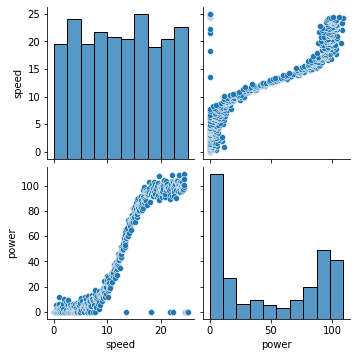

In [64]:
import seaborn as sns
sns.pairplot(df)

In [65]:
def f(x, p):
    return p[0] + x * p[1]

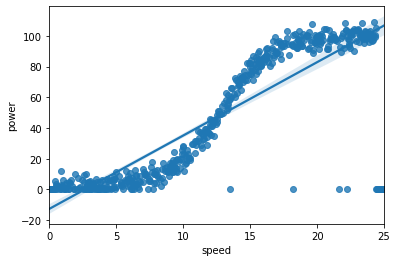

In [66]:
windspeed = df[["speed", "power"]].dropna()
sns.regplot(x="speed", y="power", data=df)

In [68]:
import sklearn.linear_model as lin

x = windspeed["power"].to_numpy()
y = windspeed["speed"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
i = model.intercept_
c = model.coef_
r= model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [48]:
i

5.418515812412033

In [49]:
c

array([0.14919858])

In [50]:
r

0.7618303380300235

In [51]:
p

[5.418515812412033, 0.14919857941833603]

In [52]:
f(70.0, p)

15.862416371695556

In [53]:
def predict(x):
    return f(x,p)

In [69]:
predict(70.0)

15.90692744979943

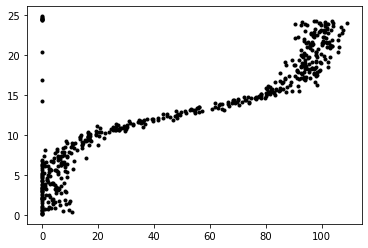

In [55]:
plt.plot(x, y, 'k.')

In [71]:
f = lambda x: 3.0 * x + 1.0

In [104]:
from sklearn.model_selection import train_test_split
# using 20% Split of Test Size -- 80% Train Data and 20% Test.
X_train20, X_test20, Y_train20, Y_test20 = train_test_split(x, y, test_size=0.20)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the 80% Training to the scaler.
scaler.fit(X_train20)

X_train = scaler.transform(X_train20)
X_test = scaler.transform(X_test20)

In [85]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [98]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 917us/step - loss: 197.5653
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 202.2649
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 205.8404
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 195.2265
Epoch 5/500
13/13 [==============================] - 0s 1000us/step - loss: 193.4751
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 205.9199
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 188.4588
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 185.1696
Epoch 9/500
13/13 [==============================] - 0s 1000us/step - loss: 194.6256
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 197.3366
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 187.1651
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 180.0299
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 166.2378
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 158.7619
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 163.1467
Epoch 102/500
13/13 [==============================] - 0s 1ms/step - loss: 162.1541
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 153.3278
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 162.4828
Epoch 105/500
13/13 [==============================] - ETA: 0s - loss: 173.509 - 0s 1ms/step - loss: 164.3535
Epoch 106/500
13/13 [==============================] - 0s 2ms/step - loss: 149.7672
Epoch 107/500
13/13 [==============================] - 0s 2ms/step - loss: 159.0192
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 154.9045
Epoch 109/500
13/13 [==============================] - 0s 2ms/step - loss: 156.2882
Epoch 110/500
13/13 [==============================] - 0s 2ms/st

13/13 [==============================] - 0s 1ms/step - loss: 131.0998
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 125.3774
Epoch 198/500
13/13 [==============================] - 0s 1ms/step - loss: 124.3487
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 136.6527
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 133.1048
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 125.0430
Epoch 202/500
13/13 [==============================] - 0s 2ms/step - loss: 116.3556
Epoch 203/500
13/13 [==============================] - 0s 2ms/step - loss: 124.3292
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 124.4789
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 124.1411
Epoch 206/500
13/13 [==============================] - 0s 2ms/step - loss: 123.0148
Epoch 207/500
13/13 [==============================] - 0s 2ms/step - loss: 124.2634
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 103.1856
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 105.1211
Epoch 295/500
13/13 [==============================] - 0s 999us/step - loss: 94.0755
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 101.8237
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 108.8730
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 100.2772
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 97.5317
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 92.7845
Epoch 301/500
13/13 [==============================] - 0s 2ms/step - loss: 94.1725
Epoch 302/500
13/13 [==============================] - 0s 998us/step - loss: 99.6566
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 108.1732
Epoch 304/500
13/13 [==============================] - 0s 1ms/step - loss: 99.0041
Epoch 30

13/13 [==============================] - 0s 1ms/step - loss: 75.1786
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 76.0412
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 77.1642
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 89.4355
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 79.9028
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 81.7029
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 84.1499
Epoch 398/500
13/13 [==============================] - ETA: 0s - loss: 85.93 - 0s 1ms/step - loss: 79.4945
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 74.5857
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 76.2501
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 84.7050
Epoch 402/500
13/13 [==============================] - 0s 1ms/step - loss: 77

13/13 [==============================] - 0s 1ms/step - loss: 69.2705
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 68.7337
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 54.8525
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 64.4602
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 59.6132
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 62.9118
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 55.1459
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 54.2238
Epoch 497/500
13/13 [==============================] - 0s 1000us/step - loss: 58.2560
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 63.0258
Epoch 499/500
13/13 [==============================] - 0s 1ms/step - loss: 63.4362
Epoch 500/500
13/13 [==============================] - 0s 1ms/step - loss: 58.8599


In [81]:
model.predict([20.0,30.0,40.0,50.0])

array([[ 61.543957],
       [ 91.45639 ],
       [121.36881 ],
       [151.28123 ]], dtype=float32)

In [99]:
np.array([[f(i)] for i in [20.0, 30.0, 40.0, 50.0]])

array([[ 61.],
       [ 91.],
       [121.],
       [151.]])

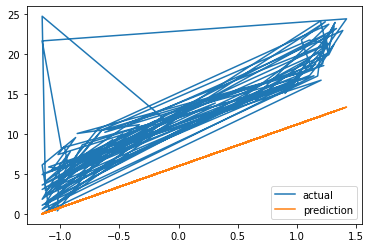

In [100]:
plt.plot(X_test, Y_test, label='actual')
plt.plot(X_test, model.predict(X_test), label='prediction')
plt.legend();

In [101]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 52.7548


52.75477981567383

In [102]:
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

NameError: name 'poly' is not defined

### References

[1] GMIT, “Quality assurance framework,”
https://www.gmit.ie/general/quality-assurance-framework.

[2] I. McLoughlin, “Using git for assessments,”
https://github.com/ianmcloughlin/using-git-for-assessments/.

[3]
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.sciencedirect.com/science/article/abs/pii/S0196890419308052

https://keras.io/examples/vision/mnist_convnet/

https://github.com/ianmcloughlin/project-2020/blob/main/train-model.ipynb